In [1]:
from IPython.core.display import HTML
HTML("\n".join(open('mioti_style.css', 'r').readlines()))

<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Worksheet S2: Introducción a los problemas de clasificación

## Objetivos

El objetivo de este worksheet es desarrollar la intuición que nos ayude a comprender los problemas de clasificación y el funcionamiento de un pipeline de trabajo típico en machine learning.

## Los problemas de clasificación

Imaginate que tenemos un dataset (conjunto de datos) con datos de distintos sensores de un coche (temperatura del motor, nivel de aceite...), y queremos saber a partir de esos sensores si el coche está funcionando bien o mal. ¿Cómo podríamos hacerlo?.

La manera tradicional consiste en crear una serie de reglas que relacionen los distintos sensores y que definan que rangos de funcionamiento son buenos o malos. De esta manera podríamos definir si el funcionamiento es `bueno` o `malo`.

Cada una de las reglas podría ser de este estilo:

<pre class="code">
si (temp_motor > 100ºC) y (nivel_aceite < 30) entonces estado malo
si (temp_motor >  30ºC) y (nivel_aceite > 30) entonces estado bueno
</pre>

El problema de este enfoque es que nos obliga a conocer las relaciones que existen entre cada una de las variables y esto puede ser muy complicado.

La premisa de la que parte el aprendizaje automático es la siguiente: **¿Podríamos a partir de un conjunto de datos ya etiquetados generar automáticamente esas `reglas`?**

<img src="ml_vs_programming.png" width="40%" />

Como veremos a lo largo de esta asignatura, la respuesta es sí.

Antes de empezar:

* Llamaremos a esas `reglas` que queremos generar: **`modelo`**. Como veremos, cada algoritmo de clasificación genera un tipo de reglas distintas.
* Llamaremos al conjunto de datos previamente etiquetados: `conjunto de entrenamiento`.
* A cada uno de los casos individuales a evaluar lo llamaremos `instancia`.


## Configuración del entorno

Como siempre, antes de empezar cargaremos los paquetes a utilizar.

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset de prueba

Para empezar, vamos a generar un dataset aleatorizado mediante algunas funciones que nos proporciona `sklearn`. Utilizaremos la función `make_moons` para generar un dataset con dos categorias (`0` y `1`) formado por dos circulos que se superponen.

In [3]:
from sklearn.datasets import make_moons

dataset = make_moons(noise=0.3, random_state=0)

Como podemos observar el dataset está formado por una lista que contiene a su vez otras dos listas. La primera, llamada generalmente el vector `X` contiene las características del dataset. En este caso como son puntos 2D, son coordenada $x$ y coordenada $y$. La segunda lista que contiene este dataset indica a que clase pertenece cada item.

In [4]:
print(dataset)

(array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633

In [5]:
dataset_X = dataset[0]

Podemos ver que son puntos:

In [6]:
print(dataset_X)

[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]
 [-0.27883014  0.61420539]
 [ 2.00344509 -0.3091496 ]
 [ 1.50009616 -0.74636376]
 [ 1.22540835  1.19793017]
 [ 0.46730819  0.54703192]
 [-0.36653222  1.11971633]
 [ 0.30124459  1.23315697]
 [ 0.30430746  0.82373935]
 [-0.23712492  0.77876034]
 [ 1.16339832  0.55290238]
 [-0.59702417  0.6572361 ]
 [ 0.46356735 -0.1951543 ]
 [ 0.68451111  0.75287685]
 [ 0.70515699 -0.45892444]
 [-0.65805008 -0.12944211]
 [-0.74662946 -0.3829632 ]
 [ 0.60585226  0.31252842]
 [ 2.18137168 -0.02291747]
 [ 1.91980633  0.17247329]
 [ 1.4834364  -0.10517023]
 [ 0.47404723 -0.14575067]
 [ 1.05614605 -1.03570207]
 [ 1.86500732 -0.01107874]
 [ 0.4194721  -0.32478101]
 [ 0.06873258  0.56648467]
 [-0.17332432  1.00215131]
 [ 0.12412421  1.00062892]
 

In [7]:
dataset_y = dataset[1]

Podemos ver que por cada punto se indica a que categoría pertenece (0 o 1)

In [8]:
print(dataset_y)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]


Podemos dibujar el dataset de la siguiente manera:

<div style="background-color:#FFFFCC; padding: 10px; margin:10px; border-radius:10px">
Todo el código que se ponga en funciones de aquí y durante el resto de la asignatura no es necesario entenderlo. Sólo es imprescindible conocer los parámetros de entrada y los de salida si los tuviera.
</div>

In [9]:
def dibuja_dataset(X, y):  
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

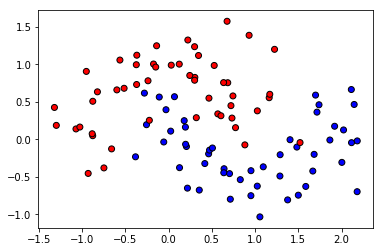

In [10]:
dibuja_dataset(dataset_X, dataset_y)

Los puntos rojos pertenecen a una clase y los azules a la otra.

### Preguntas 1

* ¿Crees que se pueden separar los puntos rojos y los azules fácilmente? ¿se te ocurre cómo?
* ¿Cómo podríamos definir la separabilidad? ¿matemáticamente qué podría ser?

## Conjunto de entrenamiento y test

Como hemos visto, el problema de la clasificación se pueden interpretar como encontrar esas "líneas" o "planos" de separación. Para ello vamos a ofrecer al ordenador un conjunto de ejemplos etiquetados para poder entrenar un modelo (`conjunto de entrenamiento`), una vez entrenado el modelo lo enfrentaremos a unos datos de test para evaluar el rendimiento del mismo (`conjunto de test`).

Para realizar estas tareas, `sklearn` dispone de varias funciones que nos facilitan el trabajo. La más simple es `train_test_split` que nos divide el dataset en dos conjuntos entrenamiento y test controlado por un parámetro `test_size` que determina que porcentaje de los datos pertenece a entrenamiento y cual a test.

In [11]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42, stratify= dataset_y)
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

In [12]:
print(len(X_train))
print(len(X_test))

70
30


Podemos dibujar el conjunto de entrenamiento:

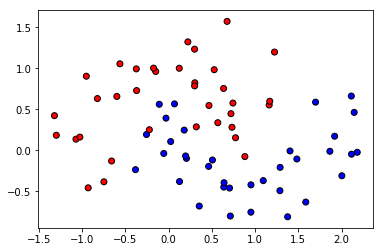

In [13]:
dibuja_dataset(X_train, y_train)

Y el de test.

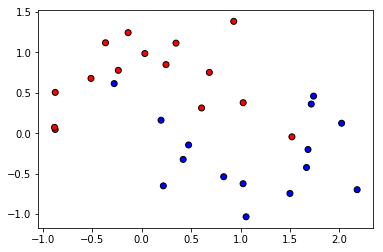

In [14]:
dibuja_dataset(X_test, y_test)

### Preguntas 2

* ¿Podría ser el conjunto de entrenamiento y el de test el mismo?
* ¿Crees que separar las instancias aleatoriamente entre entrenamiento y test es el mejor método?

## Entrenamiento y clasificación

Una vez que tenemos el dataset separado en conjunto de entrenamiento y test, estamos en condiciones de entrenar nuestro primer modelo. Para ello vamos a utilizar clasificador logístico. En esta sesión no vamos a entrar en los detalles de que es un clasificador logístico. Pero por resumir, piensa que un clasificador logístico es un algoritmo capaz de encontrar la línea de separación óptima en un conjunto de datos.

Podemos crear un clasificador logístico con `sklearn` de la siguiente manera:

In [15]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Como podemos ver con la función `print` este algoritmo, como casi todos en aprendizaje automático, es un algoritmo que tiene bastantes parámetros. A pesar de ello, podemos crear el algoritmo sin parámetros porque `sklearn` por defecto toma valores razonables de todos ellos.

In [16]:
print(logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Una vez creado el algoritmo, vamos a crear un modelo. Como verás el flujo tipico de los clasificadores es siempre igual.

Para ello utilizaremos la función `fit`. En función del tamaño de los datos esta función puede tardar más o menos tiempo.

In [17]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Una vez entrenado el modelo podemos evaluarlo con el conjunto de test de la siguiente manera:

In [18]:
y_predicted = logistic.predict(X_test)

In [19]:
print(y_predicted)

[0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0]


In [20]:
y_predicted_prob = logistic.predict_proba(X_test)
print(y_predicted_prob)

[[ 0.89779303  0.10220697]
 [ 0.89440798  0.10559202]
 [ 0.83550699  0.16449301]
 [ 0.88339966  0.11660034]
 [ 0.4098148   0.5901852 ]
 [ 0.06708564  0.93291436]
 [ 0.70839235  0.29160765]
 [ 0.95134403  0.04865597]
 [ 0.84726886  0.15273114]
 [ 0.89924858  0.10075142]
 [ 0.88452438  0.11547562]
 [ 0.29011189  0.70988811]
 [ 0.10731446  0.89268554]
 [ 0.22530855  0.77469145]
 [ 0.05034476  0.94965524]
 [ 0.09931199  0.90068801]
 [ 0.89161022  0.10838978]
 [ 0.26425243  0.73574757]
 [ 0.03029898  0.96970102]
 [ 0.02672899  0.97327101]
 [ 0.53190259  0.46809741]
 [ 0.07931553  0.92068447]
 [ 0.49630396  0.50369604]
 [ 0.75705224  0.24294776]
 [ 0.01529634  0.98470366]
 [ 0.95072192  0.04927808]
 [ 0.12961351  0.87038649]
 [ 0.14952609  0.85047391]
 [ 0.22820318  0.77179682]
 [ 0.76896237  0.23103763]]


In [21]:
umbral = 0.5
y_hat = np.array([1 if x >= umbral else 0 for x in y_predicted_prob[:,1]])
print(y_hat)

[0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0]


In [22]:
np.array_equal(y_hat, y_predicted)

True

En el caso del logistico, podemos ver los valores obtenidos de la recta de regresión obtenida de la siguiente manera:

In [23]:
print(logistic.coef_)
print(logistic.intercept_)

[[ 1.18256344 -2.26046544]]
[ 0.0047854]


Y podemos dibujar la línea de separación con la siguiente función:

In [24]:
def plot_2d_separator(classifier, X, y, fill=False, ax=None, eps=None):
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()

    ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")

Y la usamos de la siguiente manera:

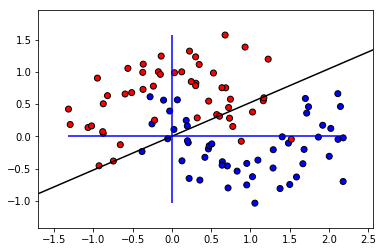

In [25]:
plot_2d_separator(logistic, dataset_X, dataset_y)
plt.hlines(0, dataset_X[:,0].min(),dataset_X[:,0].max(), colors='b')
plt.vlines(0, dataset_X[:,1].min(),dataset_X[:,1].max(), colors='b')

Podemos ver que la linea de separacion corresponde con la linea obtenida con los coeficientes 
que hemos obtenido arriba:

$0 = 1.18x -2.26y + 0.005$

Despejando la Y:

$y = 0.52x+0.002$

    

Existen infinidad de clasificadores implementados en `sklearn`. 

Por ejemplo el perceptrón multicapa se instancia de la siguiente manera:

`from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()`

Su uso es totalmente análogo al del logístico.

## Métricas de evaluación

Una vez entrenado un modelo, es interesante evaluar el rendimiento del mismo, ¿cómo podríamos hacerlo?.

La forma más evidente es comparar los resultados del modelo versus los resultados reales del conjunto de test.  Esto lo podemos hacer de la siguiente manera:

In [26]:
print(y_predicted)
print(y_test)

[0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0]
[0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0]


### Porcentaje de acierto

Como primera métrica de evaluación podemos contar el porcentaje de acierto (*accuracy*). Qué se define como el número de casos en los que el algoritmo ha acertado entre el número de casos totales.

In [27]:
np.mean(y_predicted == y_test)

0.83333333333333337

Como esta métrica es muy habitual `sklearn` provee una función nos hace este cálculo automáticamente.

In [28]:
print(logistic.score(X_test, y_test))

0.833333333333


En este caso el 83,3% de las instancias han sido correctamente clasificadas.

### Matriz de confusión

Aunque el porcentaje de acierto es sencillo de entender muestra una realidad muy parcial del problema.

Imaginate que en nuestro ejemplo del automóvil tuviéramos un 83% de acierto. Podría ocurrir que nuestro modelo clasificara bien todos los casos en los que el coche estuviera bien, pero ninguno en los que estuviera mal. Podemos tener un buen porcentaje de acierto, y que el clasificador funcione mal en nuestra aplicación real.

Un método un poco más complejo, pero muy efectivo es utilizar la `matriz de confusión` esta matriz nos indica por cada categoría a clasificar (lo que se denomina `clase`) cuantos casos han sido clasificados bien y cuantos mal.

Podemos obtener la matriz de confusión con sklearn de la siguiente manera:

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[12,  3],
       [ 2, 13]], dtype=int64)

In [30]:
confusion_matrix(y_test, y_predicted, labels=[0,1])

array([[12,  3],
       [ 2, 13]], dtype=int64)

Esta matriz se lee de la siguiente forma:

```
         |    | 0  | 1  | <- clasificado como (clase predicha)
         |----|----|----| 
clase    | 0  | 12 | 3  |
real     | 1  | 2  | 13 |
```

Es decir:

* Existen 12 casos donde realmente habia un 0 y el clasificador nos dijo que era 0
* Existen 13 casos donde realmente habia un 1 y el clasificador nos dijo que era 1
* Existen 2 casos donde realmente habia un 1 y el clasificador nos dijo que era 0
* Existen 3 casos donde realmente habia un 0 y el clasificador nos dijo que era 1

Podemos dibujar también la matriz de confusión de la siguiente manera:

In [31]:
confusion_matrix(y_test, y_predicted, labels=[1,0])

array([[13,  2],
       [ 3, 12]], dtype=int64)

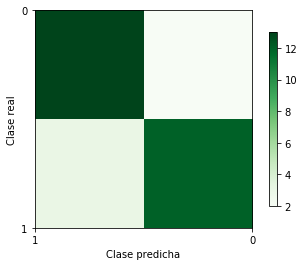

In [32]:
plt.imshow(confusion_matrix(y_test, y_predicted, labels=[1,0]), cmap="Greens", extent=[1,0,1,0])
plt.colorbar(shrink=0.8)
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("Clase predicha")
plt.ylabel("Clase real");

Además de dibujar la matriz de confusión como se ha expresado antes, existen otros paquetes que nos facilitan esta tarde. Es interesante el paquete `scikit-plot` que dispone de varias funciones muy útiles para machine learning.

Aunque este paquete no está disponible en anaconda como paquete por defecto, se puede instalar con el siguiente comando:

<pre class="code">
conda install -c conda-forge scikit-plot
</pre>

En:
* **OSX y Linux**: lo podéis instalar ejecutando ese comando directamente en un terminal.
* **Windows**: Podéis abrir la terminal de conda (menú inicio / conda) y ahí pegar ese comando. Si os da problemas (ha habido cambios en algunos paquetes que generan incompatibilidades en Windows) lo podéis solucionar ejecutano en el prompt de anaconda:

<pre class="code">
pip install pillow==4.0.0
pip install scikit-image

o, bien
pip install scikit-plot (https://scikit-plot.readthedocs.io/en/stable/Quickstart.html)
</pre>

Después hay que resetear el kernel en el notebook Jupyter.

Una vez instalado, podéis dibujar la matriz de confusión de la siguiente manera:

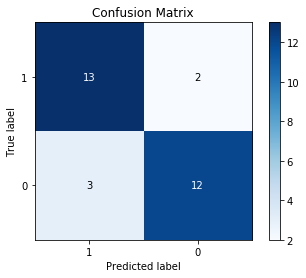

In [33]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predicted, labels=[1,0])

Además, `scikit-plot` tiene un parámetro bastante interesante que es `normalize` que si lo ajustamos a `True` nos normaliza la matriz de confusión.

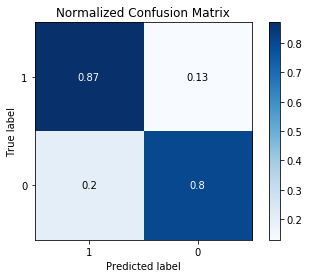

In [34]:
skplt.metrics.plot_confusion_matrix(y_test, y_predicted, labels=[1,0], normalize=True)

También es interesante pensar que significa cada celda de la matriz de confusión. De hecho cada celda tiene un nombre propio:

```
         |     | Sí                      | No                      | <- clasificado como (clase predicha)
         |-----|-------------------------|-------------------------| 
clase    | Sí  | Verdadero Positivo (VP) | Falso Negativo (FN)     |
real     | No  | Falso Positivo (FP)     | Verdadero Negativo (VN) |

```

Además de poder interpretar las medidas individuales de la matriz de confusión podemos obtener algunas medidas interesantes:

#### Porcentaje de acierto

El porcentaje de acierto nos dice cuantos elementos han sido bien clasificados.

$${Porcentaje \space de \space acierto} = \frac{VP + VN}{(VP + FN + FP + VN)}$$

#### Precisión

La precisión nos dice que porcentaje de acierto hay en los elementos positivos.

$$Precisión = \frac{VP}{(VP + FP)}$$

#### Recall

El recall nos dice cuantos elementos positivos han sido bien clasificados.

$$Recall = \frac{VP}{(VP + FN)}$$



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("accuracy: {}".format(accuracy_score(y_test,y_predicted)))
print("precision_score: {}".format(precision_score(y_test,y_predicted)))
print("recall_score: {}".format(recall_score(y_test,y_predicted)))
print("F1: {}, muy importante!!!".format(f1_score(y_test,y_predicted)))
print("AUC: {}, muy importante tambien y es independiente del umbral!!!".format(roc_auc_score(y_test,y_predicted_prob[:,1])))

accuracy: 0.8333333333333334
precision_score: 0.8125
recall_score: 0.8666666666666667
F1: 0.8387096774193549, muy importante!!!
AUC: 0.9333333333333333, muy importante tambien y es independiente del umbral!!!


### Que pasa si cambiamos el umbral!!!

In [46]:
umbral = 0.5
y_hat = np.array([1 if x >= umbral else 0 for x in y_predicted_prob[:,1]])
print(y_test)
print(y_hat)

print("accuracy: {}".format(accuracy_score(y_test,y_hat)))
print("precision_score: {}".format(precision_score(y_test,y_hat)))
print("recall_score: {}".format(recall_score(y_test,y_hat)))
print("F1: {}".format(f1_score(y_test,y_hat)))
print("AUC: {}".format(roc_auc_score(y_test,y_predicted_prob[:,1])))

confusion_matrix(y_test, y_hat, labels=[1,0])

[0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0]
[0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0]
accuracy: 0.8333333333333334
precision_score: 0.8125
recall_score: 0.8666666666666667
F1: 0.8387096774193549
AUC: 0.9333333333333333


array([[13,  2],
       [ 3, 12]], dtype=int64)

In [49]:
umbral = 0.9
y_hat = np.array([1 if x >= umbral else 0 for x in y_predicted_prob[:,1]])
print(y_test)
print(y_hat)

print("accuracy: {}".format(accuracy_score(y_test,y_hat)))
print("precision_score: {}".format(precision_score(y_test,y_hat)))
print("recall_score: {}".format(recall_score(y_test,y_hat)))
print("F1: {}".format(f1_score(y_test,y_hat)))
print("AUC: {}".format(roc_auc_score(y_test,y_predicted_prob[:,1])))

confusion_matrix(y_test, y_hat, labels=[1,0])

[0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0]
accuracy: 0.7333333333333333
precision_score: 1.0
recall_score: 0.4666666666666667
F1: 0.6363636363636364
AUC: 0.9333333333333333


array([[ 7,  8],
       [ 0, 15]], dtype=int64)

In [47]:
umbral = 0.1
y_hat = np.array([1 if x >= umbral else 0 for x in y_predicted_prob[:,1]])
print(y_test)
print(y_hat)

print("accuracy: {}".format(accuracy_score(y_test,y_hat)))
print("precision_score: {}".format(precision_score(y_test,y_hat)))
print("recall_score: {}".format(recall_score(y_test,y_hat)))
print("F1: {}".format(f1_score(y_test,y_hat)))
print("AUC: {}".format(roc_auc_score(y_test,y_predicted_prob[:,1])))

confusion_matrix(y_test, y_hat, labels=[1,0])

[0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
accuracy: 0.5666666666666667
precision_score: 0.5357142857142857
recall_score: 1.0
F1: 0.6976744186046512
AUC: 0.9333333333333333


array([[15,  0],
       [13,  2]], dtype=int64)

### Preguntas 3

* ¿Qué ventaja nos aporta la matriz de confusión respecto al porcentaje de acierto?
* ¿Se te ocurre alguna "debilidad" al porcentaje de acierto como criterio de clasificación?